In [1]:
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
from scipy import stats
from math import cos,sin,pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
missing_values = data.isnull().sum()
print("Jumlah Nilai Missing di Setiap Kolom:")
print(missing_values)
print("-----------")

Jumlah Nilai Missing di Setiap Kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
-----------


In [26]:
num = data.select_dtypes(include=[np.number]).columns
cat = data.select_dtypes(exclude=[np.number]).columns
data[num] = data[num].fillna(data[num].mean())
data[cat] = data[cat].apply(lambda col: col.fillna(col.mode().iloc[0]))
data = data.infer_objects(copy=False)
fixvalues = data.isnull().sum()
print(fixvalues)
print("----------------------")
print("   ")
data = data.infer_objects()
data.info()
print(data.describe())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
----------------------
   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  th

In [49]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    
    return df

numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data = handle_outliers_iqr(data, col)

In [51]:
print("Jumlah Outlier di Setiap Kolom (Z-score > 3):")
print(outliers)

Jumlah Outlier di Setiap Kolom (Z-score > 3):
id          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     1
ca          0
num         0
dtype: int64


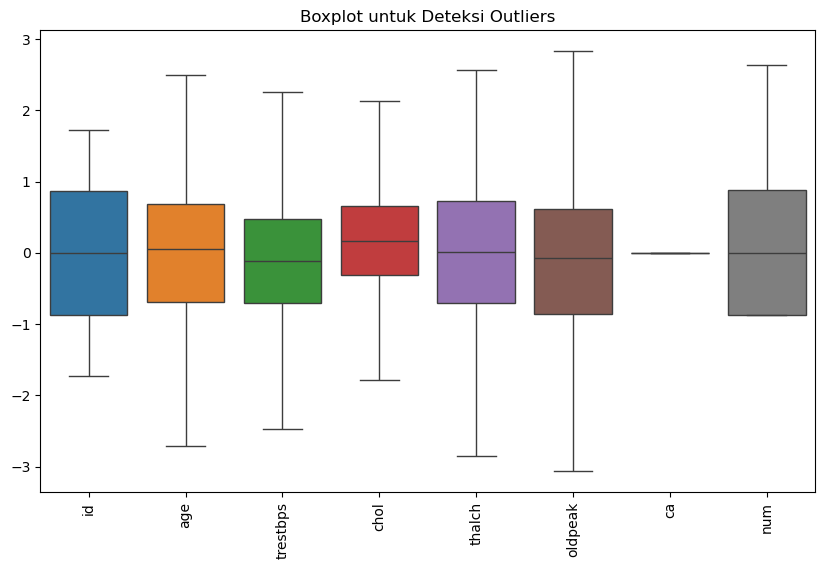

In [43]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_cols])
plt.title('Boxplot untuk Deteksi Outliers')
plt.xticks(rotation=90)
plt.show()